# **Model Building And Intrepretation**

### **Required Library**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### **Data Collection**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/GUVI FINAL PROJRCT/RFS_Cleaned_Dataset.csv')

In [3]:
df

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,1,1,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,24924.5000
1,1,2,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,50605.2700
2,1,3,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,13740.1200
3,1,4,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,39954.0400
4,1,5,0,42.31,2.572,5,2,2010,1,151315,7422.4664,6443.322,145.5875,16721.9869,4489.6821,211.096358,8.10600,32229.3800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,45,94,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499,4392.5763
551475,45,95,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499,56064.7318
551476,45,96,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499,1094.3121
551477,45,97,0,76.06,3.804,26,7,2013,2,118221,212.0200,851.730,2.0600,10.8800,1864.5700,193.267465,8.67499,6337.4919


## **Predictor vs Response Variable**

In [4]:
x = df.drop('Weekly_Sales',axis=1)

y = df['Weekly_Sales']

## **Model Selection**

In [ ]:
def model_regression(xtrain,xtest,ytrain,ytest,algorithm):


  for i in algorithm:

    model = i().fit(xtrain,ytrain)


    # predict for train and test accuracy

    y_train_pred = model.predict(xtrain)


    y_test_pred  = model.predict(xtest)

    # R2 score

    r2_training = r2_score(ytrain,y_train_pred)

    r2_testing = r2_score(ytest,y_test_pred)

    # MAE Score
    mae_testing = mean_absolute_error(ytest,y_test_pred)

    # MSE Score
    mse_testing = mean_squared_error(ytest,y_test_pred)

    # RMSE SCore
    rmse_testing = np.sqrt(mean_squared_error(ytest,y_test_pred))

    data = {'Algorithm':i.__name__, 'Training R2 Score':r2_training,'Testing R2 Score':r2_testing,'MAE':mae_testing,'MSE':mse_testing,'RMSE':rmse_testing}


    print(data)

**`Split Data`**

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
model_regression(xtrain,xtest,ytrain,ytest,[RandomForestRegressor,DecisionTreeRegressor,ExtraTreesRegressor,AdaBoostRegressor,XGBRegressor,GradientBoostingRegressor])

{'Algorithm': 'RandomForestRegressor', 'Training R2 Score': 0.9973151500811724, 'Testing R2 Score': 0.9769857610476683, 'MAE': 1193.6342204833313, 'MSE': 11748340.24912464, 'RMSE': 3427.5851921031285}
{'Algorithm': 'DecisionTreeRegressor', 'Training R2 Score': 1.0, 'Testing R2 Score': 0.9574968155590637, 'MAE': 1683.0666671756007, 'MSE': 21697083.85828809, 'RMSE': 4658.012865835397}
{'Algorithm': 'ExtraTreesRegressor', 'Training R2 Score': 0.9999999999999999, 'Testing R2 Score': 0.9785393391484648, 'MAE': 1175.7644674524236, 'MSE': 10955267.570529884, 'RMSE': 3309.874252978485}
{'Algorithm': 'AdaBoostRegressor', 'Training R2 Score': -0.3158334500689537, 'Testing R2 Score': -0.326493914130104, 'MAE': 21883.443092959867, 'MSE': 677150431.6902347, 'RMSE': 26022.114281707294}
{'Algorithm': 'XGBRegressor', 'Training R2 Score': 0.9522167106503114, 'Testing R2 Score': 0.9441222964487436, 'MAE': 2947.4891156363174, 'MSE': 28524526.707991447, 'RMSE': 5340.8357686781055}
{'Algorithm': 'GradientB

## **Model Building (RandomForestRegressor)**

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
model = RandomForestRegressor().fit(xtrain,ytrain)

model

RandomForestRegressor()

**Accuracy Check**

In [ ]:
y_test_pred  = model.predict(xtest)

r2_testing = r2_score(ytest,y_test_pred)

r2_testing*100

97.58350875219631

### **Prediction**

In [ ]:
data = x.loc[[10000,8000,55000]]
data

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
10000,16,90,0,18.12,2.586,26,2,2010,2,57197,5480.7127,1822.1091,78.6696,1486.1364,2779.0627,189.601802,7.039
8000,30,97,0,39.75,2.514,19,2,2010,3,42988,560.1677,888.5600,41.9200,141.3344,2805.0176,210.945160,8.324
55000,32,2,0,70.86,2.684,11,6,2010,1,203007,14109.1464,221.9419,43.7785,3545.2663,5765.7583,189.400073,8.963


In [ ]:
actual = [y.loc[10000],y.loc[8000],y.loc[55000]]
actual

[5302.95, 13058.64, 50918.38]

In [ ]:
predicted = model.predict(data)

predicted

array([ 5287.264122, 13276.7817  , 50969.9316  ])

**`Plot`**

Difference : [15.685877999997501, -218.14169999999467, -51.551599999955215]



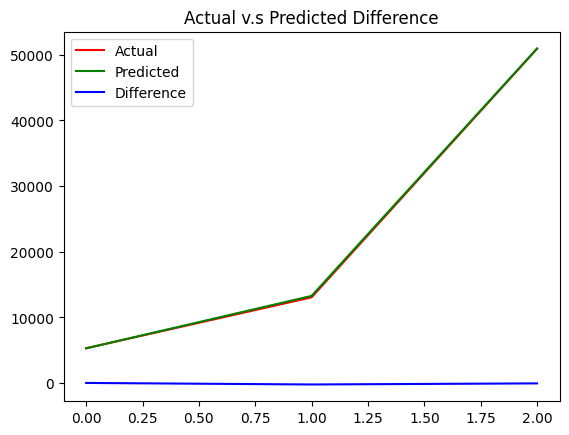

In [ ]:
difference = [actual[i]-predicted[i] for i in range(len(actual))]

print(f'Difference : {difference}')

print()

plt.plot(actual,label='Actual',color='r')
plt.plot(predicted,label='Predicted',color='g')
plt.plot(difference,label='Difference',color='b')
plt.legend()

plt.title('Actual v.s Predicted Difference')
plt.show()

### **Feature Importance**

In [ ]:
importance = model.feature_importances_
importance

array([5.57493233e-02, 6.38358413e-01, 3.31422602e-04, 7.47447738e-03,
       2.95362708e-03, 4.75498373e-03, 1.22613538e-02, 7.28577533e-04,
       1.40620498e-02, 1.79420498e-01, 2.95477667e-03, 3.34606242e-03,
       3.57109994e-02, 8.00482824e-03, 2.57766204e-03, 2.30629638e-02,
       8.24798205e-03])

In [ ]:
feature = [i for i in x.columns]
feature

['Store',
 'Dept',
 'IsHoliday',
 'Temperature',
 'Fuel_Price',
 'Day',
 'Month',
 'Year',
 'Type',
 'Size',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment']

In [ ]:
feature_importance = {}

for i in range(len(feature)):
     feature_importance.update({feature[i]:importance[i]*100})


feature_importance

{'Store': 5.574932329200558,
 'Dept': 63.83584125635981,
 'IsHoliday': 0.03314226018688134,
 'Temperature': 0.7474477376454275,
 'Fuel_Price': 0.2953627080590145,
 'Day': 0.4754983726403278,
 'Month': 1.226135381489444,
 'Year': 0.07285775330637642,
 'Type': 1.4062049789927276,
 'Size': 17.94204975371908,
 'MarkDown1': 0.2954776668871168,
 'MarkDown2': 0.33460624214850826,
 'MarkDown3': 3.571099942698286,
 'MarkDown4': 0.8004828237433986,
 'MarkDown5': 0.2577662037275738,
 'CPI': 2.3062963842033533,
 'Unemployment': 0.8247982049921254}

In [ ]:
sorted_feature_importance  = dict(sorted(feature_importance.items(),key=lambda item : item[1],reverse=True))
sorted_feature_importance

{'Dept': 63.83584125635981,
 'Size': 17.94204975371908,
 'Store': 5.574932329200558,
 'MarkDown3': 3.571099942698286,
 'CPI': 2.3062963842033533,
 'Type': 1.4062049789927276,
 'Month': 1.226135381489444,
 'Unemployment': 0.8247982049921254,
 'MarkDown4': 0.8004828237433986,
 'Temperature': 0.7474477376454275,
 'Day': 0.4754983726403278,
 'MarkDown2': 0.33460624214850826,
 'MarkDown1': 0.2954776668871168,
 'Fuel_Price': 0.2953627080590145,
 'MarkDown5': 0.2577662037275738,
 'Year': 0.07285775330637642,
 'IsHoliday': 0.03314226018688134}

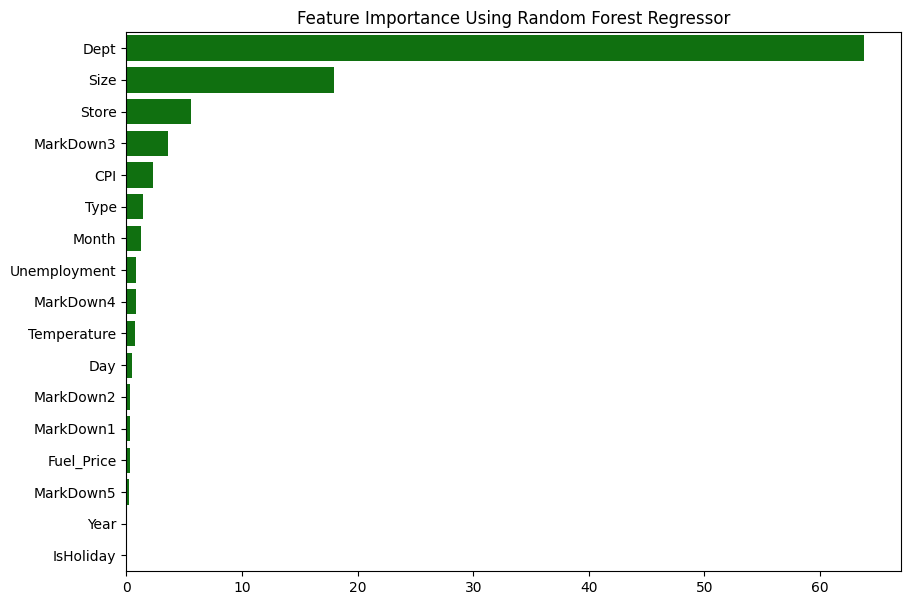

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x=[i for i in sorted_feature_importance.values()],y=[i for i in sorted_feature_importance.keys()],color='g').set(title='Feature Importance Using Random Forest Regressor')
plt.show()

### **Pickle File**

**Download The Model**

In [ ]:
with open('regressor_model.pkl','wb') as f:
  pickle.dump(model,f)



```                                                               
                                                     Finished
```

